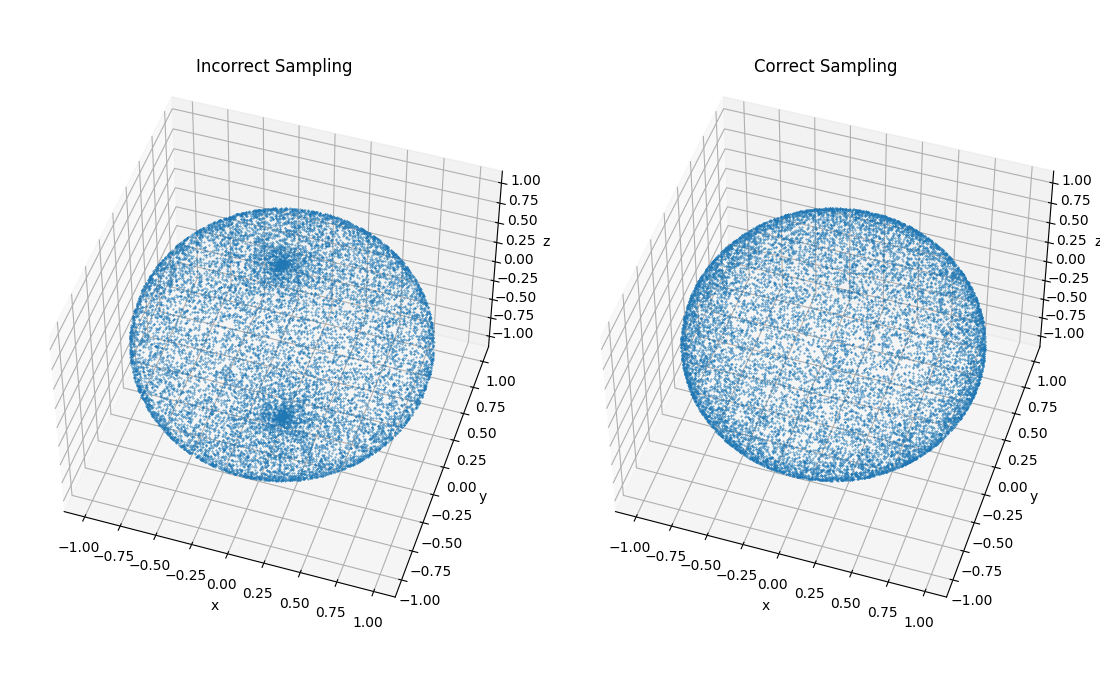

In [1]:
"""surface_sampling_sphere.ipynb"""
# Cell 1

# This code corrects the problem where the distribution of random points fails to 
# maintain uniform density throughout the surface of a 3D unit sphere. 

# Code is modified from that given by Dr. David Biersach. 

# Code is aided by: http://graphics.cs.cmu.edu/courses/15-468/lectures/lecture_08.pdf 


# Allows for type hinting
from __future__ import annotations
# Allows for type hinting
import typing
# Used for plotting
import matplotlib.pyplot as plt
# Used for calculations 
import numpy as np
# Generates pseudo random numbers
import numpy.random as random
# Used for tick marks 
from matplotlib.markers import MarkerStyle

if typing.TYPE_CHECKING:
    # Allows type checking for axes and arrays 
    from matplotlib.axes import Axes
    from numpy.typing import NDArray
# Menu bar on the side of the plot 
%matplotlib widget


def plot_incorrect(ax: Axes) -> None:
    """Generate random poloidal and toroidal angles for non-uniform sampling across the full face of the sphere"""
    num_samples = 15000
    # Pick random poloidal angle (0≤𝜙<𝜋) 
    u: NDArray[np.float_] = random.rand(num_samples) * np.pi  # poloidal angle
    # Pick random toroidal angle (0≤𝜃<2𝜋) 
    v: NDArray[np.float_] = random.rand(num_samples) * 2 * np.pi  # toroidal angle
    # Calculate spherical coordinates 
    x: NDArray[np.float_] = np.array(np.sin(u) * np.sin(v), dtype=np.float_)
    y: NDArray[np.float_] = np.array(np.sin(u) * np.cos(v), dtype=np.float_)
    z: NDArray[np.float_] = np.cos(u)

    ax.set_title("Incorrect Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")  # type: ignore

    ax.view_init(azim=-72, elev=48)  # type: ignore
    # Do a scatter plot of dots that are pixel sized 
    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, z, marker=MarkerStyle("."), s=pixel_size, depthshade=False)  # type: ignore


def plot_correct(ax: Axes) -> None:
    """Generate poloidal and toroidal angles that are both uniform with respect to surface area"""
    num_samples = 15000

    # TODO: Fix this next line
    # Poloidal angle must be calculated with cos^-1(2(random #)-1) in order to be uniformly distributed wrt surface area 
    u: NDArray[np.float_] = np.arccos((2*random.rand(num_samples))-1)   # poloidal angle
    # Pick random toroidal angle (0≤𝜃<2𝜋) 
    v: NDArray[np.float_] = random.rand(num_samples) * 2 * np.pi  # toroidal angle
    # Calculate spherical coordinates 
    x: NDArray[np.float_] = np.array(np.sin(u) * np.sin(v), dtype=np.float_)
    y: NDArray[np.float_] = np.array(np.sin(u) * np.cos(v), dtype=np.float_)
    z = np.cos(u)

    ax.set_title("Correct Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")  # type: ignore

    ax.view_init(azim=-72, elev=48)  # type: ignore
    # Do a scatter plot of dots that are pixel sized 
    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, z, marker=MarkerStyle("."), s=pixel_size, depthshade=False)  # type: ignore


def main() -> None:
    """Define an entry point for the function"""
    # Show the plots for both the correct and incorrect methods 
    plt.close("all")
    plt.figure(" ", figsize=((11, 7)), constrained_layout=True)
    plot_incorrect(plt.subplot(121, projection="3d"))
    plot_correct(plt.subplot(122, projection="3d"))
    plt.show()

# Call the main function 
main()